In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv("IRIS.csv")
data = pd.DataFrame(data)

train = data.iloc[:,0:4]
test = data.iloc[:,4:5]

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.20, random_state=20)

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Robust Scaler

In [3]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(x_train)

X_test = scaler.transform(x_test)

## Model Fit

In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)

### Y-Predict

In [5]:
y_pred = dtc.predict(X_test)

### Confusion Matrix & Accuracy Score

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


In [7]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Tree Visualization

[Text(213.05454545454546, 398.64, 'X[2] <= -0.468\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(152.1818181818182, 326.15999999999997, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(273.92727272727274, 326.15999999999997, 'X[3] <= 0.233\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(121.74545454545455, 253.67999999999998, 'X[2] <= 0.312\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(60.872727272727275, 181.2, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(182.61818181818182, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(426.1090909090909, 253.67999999999998, 'X[3] <= 0.3\ngini = 0.095\nsamples = 40\nvalue = [0, 2, 38]'),
 Text(304.3636363636364, 181.2, 'X[0] <= 0.077\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(243.4909090909091, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(365.23636363636365, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(547.8545454545455, 181.

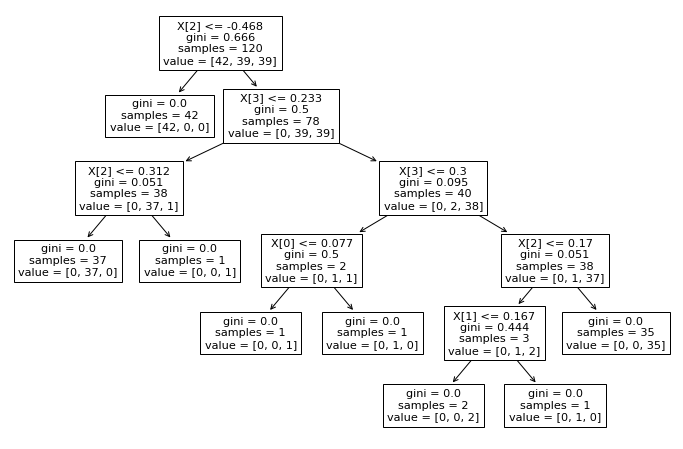

In [8]:
from sklearn import tree

plt.figure(figsize=(12,8))

tree.plot_tree(dtc.fit(X_train, y_train))

## Model Tune

### Parameters

In [9]:
dtc_params = {"criterion": ["gini", "entropy"],
              "min_samples_split": np.arange(1,10,1),
              "max_features":["auto", "sqrt", "log2"]}

### GridSearch 

In [10]:
from sklearn.model_selection import GridSearchCV

dtc_model = GridSearchCV(dtc, dtc_params, cv=10)
dtc_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [11]:
print("Best Parameter: ", dtc_model.best_params_)

Best Parameter:  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5}


### Model Tunning with Best Parameters

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc_tuned = DecisionTreeClassifier(criterion = 'gini', 
                                   max_features= 'auto', 
                                   min_samples_split= 5)
dtc_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_features='auto', min_samples_split=5)

### Y-Predict

In [13]:
y_pred = dtc_tuned.predict(X_test)

### Confusion Matrix & Accuracy Score

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  4  7]]


In [15]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


### Tree Visualization

[Text(213.05454545454546, 398.64, 'X[2] <= -0.468\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(152.1818181818182, 326.15999999999997, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(273.92727272727274, 326.15999999999997, 'X[2] <= 0.142\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(121.74545454545455, 253.67999999999998, 'X[3] <= 0.233\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(60.872727272727275, 181.2, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(182.61818181818182, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(426.1090909090909, 253.67999999999998, 'X[0] <= 0.269\ngini = 0.172\nsamples = 42\nvalue = [0, 4, 38]'),
 Text(304.3636363636364, 181.2, 'X[3] <= 0.367\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(243.4909090909091, 108.71999999999997, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(365.23636363636365, 108.71999999999997, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(547.8545454545455

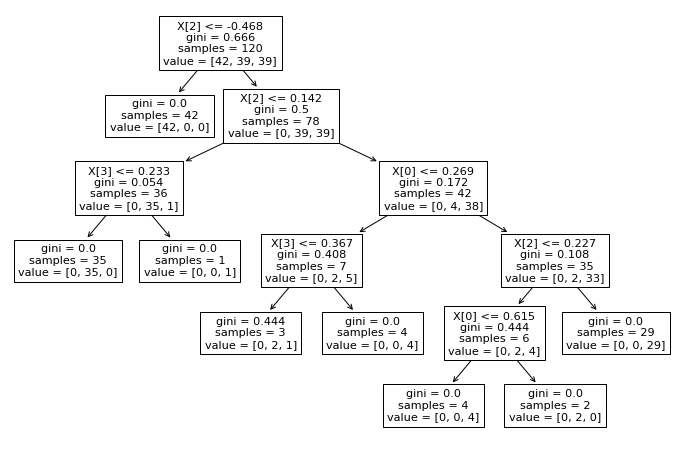

In [16]:
from sklearn import tree

plt.figure(figsize=(12,8))

tree.plot_tree(dtc_tuned.fit(X_train, y_train))